In [1]:
import pandas as pd
data = pd.read_csv('NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/Users/anand/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

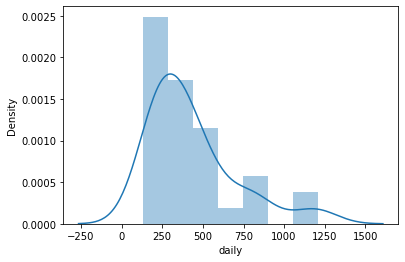

In [4]:
import seaborn as sns
sns.distplot(data['daily'])

/Users/anand/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

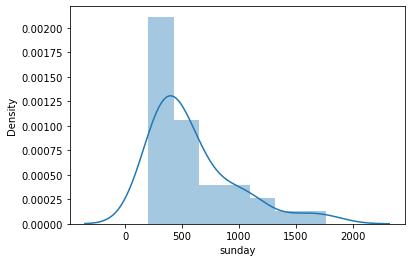

In [5]:
sns.distplot(data['sunday'])

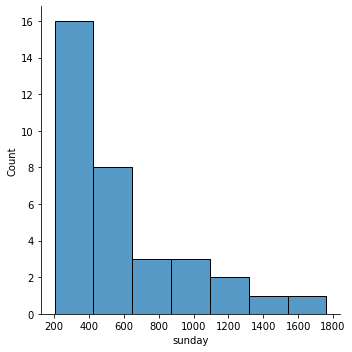

In [7]:
sns.displot(data['sunday'])

<AxesSubplot:xlabel='sunday', ylabel='Count'>

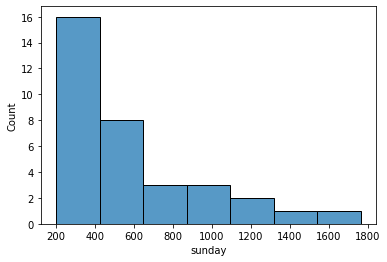

In [8]:
sns.histplot(data['sunday'])

In [6]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

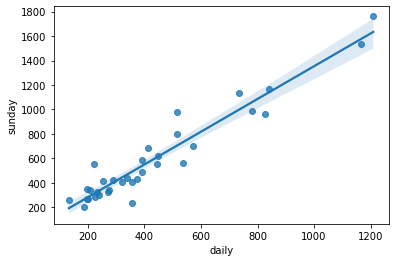

In [9]:
sns.regplot(x='daily',y='sunday',data=data)

In [10]:
# Coefficient
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [11]:
#t & p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [12]:
# R squared values
model.rsquared

0.9180596895873294

# Predict for the new data point

In [13]:
# Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [14]:
newdata

0    200
1    300
dtype: int64

In [15]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [16]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64